Accuracy: 0.9135712551590192

Confusion Matrix:
 [[10591   377]
 [  691   698]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.65      0.50      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



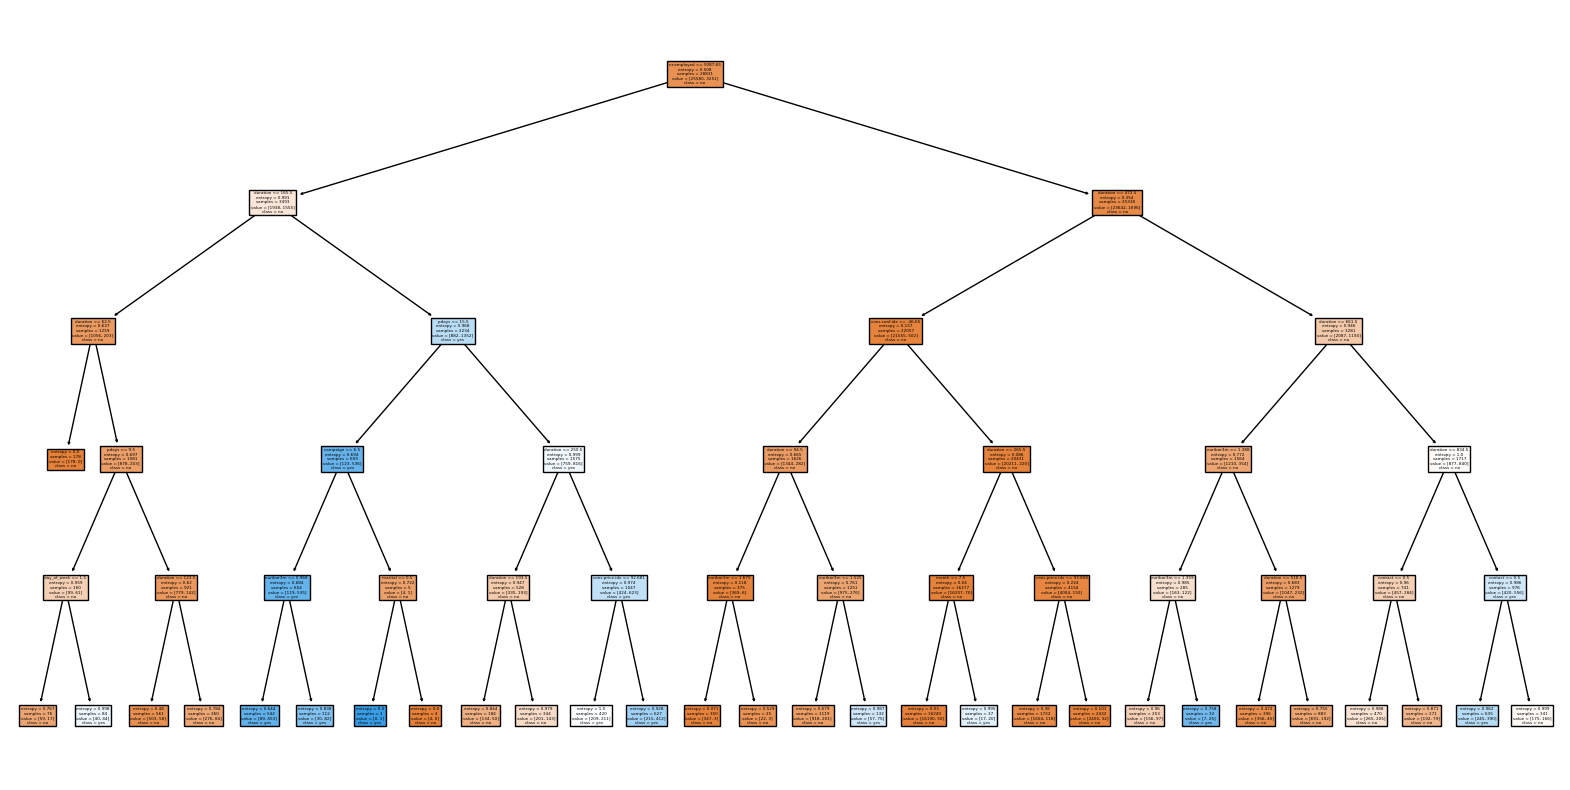

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Step 1: Load the dataset
df = pd.read_csv("C:\\Users\\yashu\\Downloads\\bank+marketing\\bank-additional\\bank-additional\\bank-additional-full.csv", sep=';')

# Step 2: Encode categorical features except 'y'
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    if column != 'y':  # encode all except target
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target column 'y' separately and save encoder
le_y = LabelEncoder()
df['y'] = le_y.fit_transform(df['y'])  # yes/no to 1/0

# Step 3: Split data
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize the tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=le_y.classes_, filled=True)
plt.show()
